# Estimating Covariance Structures
Last week, we saw that we can model repeated measures probabilistically by making using of the *multivariate* normal distribution. Key to this, was the specification of the variance-covariance matrix, which captures the pattern of correlation across the repeated measurements. We also saw that one of the problems with the repeated measures ANOVA was that it assumed a very restrictive covariance structure in the form of *compound symmetry* (more generally, *sphericity*). This had direct consequences for inference because the covariance structure directly informs the standard errors and thus the denominator of the tests statistics, the $p$-values and confidence intervals. So, much of our concern around repeated measures is about using a more suitable covariance structure to represent our data-generating process. In an ideal world, what we want is a method that makes *no* assumptions about the covariance structure and just allows it to be estimated from the data. Unfortunately, this desire has consequences for inference. In short, the condition of compound symmetry is imposed for the repeated measures ANOVA *precisely* because that is the one situation where the results simplify back to classical form and inference still works. As soon as we move away from this to an *arbitrary covariance structure*, the inferential machinery *falls apart*. In this part of the lesson, our focus will be on understanding this situation because it has direct consequences for all the methods we will cover going forward. 

## The Basic Problem
Recall that we refer to the variance–covariance matrix as $\boldsymbol{\Sigma}$, as a direct analog of the single variance term $\sigma^{2}$ from the normal linear model. Conceptually, $\boldsymbol{\Sigma}$ plays the same role, describing the scale and structure of the noise in the data. From a mathematical point of view, the natural generalisation of everything we have done so far is to simply replace $\sigma^{2}$ with $\boldsymbol{\Sigma}$ in the expressions used for the normal linear model. When $\boldsymbol{\Sigma}$ is known, this causes no fundamental difficulties. $\boldsymbol{\Sigma}$ behaves like a constant object, introducing no additional randomness, and the underlying theory remains intact. In this sense, moving from a single variance to a full covariance matrix does not, by itself, create any new problems. As we will see later, a known $\boldsymbol{\Sigma}$ can be used to *remove* the correlation structure from the data, allowing us to work in a world that is mathematically indistinguishable from the independent case.

However, the reality is that we will *almost never* know $\boldsymbol{\Sigma}$ *a priori*. As such, we will almost always be in a position where we need to *estimate* it from the data. Once we do that, the term $\boldsymbol{\Sigma}$ is no longer a *fixed constant*. Instead, we have $\hat{\boldsymbol{\Sigma}}$, which is a *random variable*. This introduces an additional layer of uncertainty that causes some major issues. We will discuss the full story below, but the short version is that treating $\hat{\boldsymbol{\Sigma}}$ as an *estimate* means we no longer know how the standard errors are distributed, which means we do not know what null distribution the test statistics have and cannot calculate a $p$-value. In short, *all our inferential machinery breaks*.

## How Estimating $\boldsymbol{\Sigma}$ Breaks Inference
We are going to spend a bit of time discussing the reasons *why* having an arbitrary covariance structure causes the classical inference techniques to fall apart. This is a bit of a detour and can get a little complicated. However, stick with it, because by the end you will have a clearer sense of why our *desire* to have an unstructured covariance matrix does not actually gel with the classical inferential machinery. This is important going forward, because we need to recognise that all the models we will discuss have this problem. Classical inference is *fragile* and as soon as we step outside a very fixed structure, it will break.

### Revisiting the Normal Linear Model
To start understanding why an arbitrary covariance structure is problematic, we need to go back to some of the information covered last semester on [Statistical Inference](https://pchn63101-advanced-data-skills.github.io/Inference-Linear-Model/2.estimation-uncertainty.html). Focusing on the normal linear model, we start from the position of assuming we know what $\sigma^{2}$ is. If this is true, then the standard errors of the parameter estimates are a *constant* quantity. If the assumptions of the model are met, then the parameter estimates have a known distribution. For example, a single slope from a typical regression model has the distribution

$$
\hat{\beta}_{1} \sim \mathcal{N}\left(\beta_{1}, \frac{\sigma^{2}}{\sum{(x_{i} - \bar{x})^{2}}}\right).
$$

The standard error is just the square-root of this variance term

$$
\text{SE}\left(\hat{\beta}_{1}\right) = \sqrt{\frac{\sigma^{2}}{\sum{(x_{i} - \bar{x})^{2}}}}
$$

which depends upon knowing $x$ (the associated predictor variable) and $\sigma^{2}$. This becomes important when we form a test statistic and want to know its null distribution. In the case where $\sigma^{2}$ is a *constant* then the standard error is *also constant*. This means that if we calculate 

$$
z = \frac{\hat{\beta}_{1}}{\text{SE}\left(\hat{\beta}_{1}\right)},
$$

we are just dividing a random variable by a constant. This does not change its distribution, only its *scale*. So, under the null hypothesis that $\beta_{1} = 0$, the null distribution of $z$ is 

$$
z \sim \mathcal{N}(0,1).
$$

This is exactly how inference was conducted before Student came along, with statisticians effectively treating the variance *as if it were known*. 

So, what happens in the more *realistic* scenario when $\sigma^{2}$ is *not* known, and must be replaced by its estimate $\hat{\sigma}^{2}$? Well, the main change is that the *standard errors* also become *estimates*

$$
\widehat{\text{SE}}\left(\hat{\beta}_{1}\right) = \sqrt{\frac{\hat{\sigma}^{2}}{\sum{(x_{i} - \bar{x})^{2}}}}, 
$$

which means that our test statistic is no longer a simple *scaling* of $\hat{\beta}_{1}$. Instead, it now has the form

$$
t = \frac{\hat{\beta}_{1}}{\widehat{\text{SE}}\left(\hat{\beta}_{1}\right)}.
$$

This is a ratio between *two* random variables. Using an *estimate* of the standard error adds an additional layer of uncertainty, because now both the *numerator* and *denominator* will change with each new sample. This additional uncertainty needs to be accommodated. In order to do this, we need to know the *sampling distribution* of $\hat{\sigma}^{2}$. 

We glossed-over this last semester, but under the normal linear model the variance estimate has the following sampling distribution

$$
\hat{\sigma}^{2} \sim \frac{\sigma^{2}}{\nu}\chi^{2}(\nu)
$$

This is a scaled $\chi^{2}$ distribution with $\nu$ degrees of freedom. This is probably unfamiliar to you, but understanding this distribution is *crucial* for understanding several key ideas 

1. Where the $t$-distribution comes from
2. Where the concept of *degree of freedom* come from
3. How degrees of freedom function as a method of quantifying uncertainty
4. Why everything collapses once we move to an arbitrary covariance matrix.

 Because of this, we will stick to this topic for a little bit longer before getting back to the point of this section. 

### Understanding the Scaled $\chi^{2}$ Distribution
In order to understand the scaled $\chi^{2}$ distribution, we need to first understand the *regular* $\chi^{2}$ distribution. This is written, for some random variable $Y$, as

$$
Y \sim \chi^{2}(\nu).
$$

Notice here that this distribution only has a *single* parameter, $\nu$, called the *degrees of freedom*. This terminology arises because the $\chi^{2}(\nu)$ is the distribution of the sum-of-squares calculated from $\nu$ standard normal variates[^chisq-foot]. So $\nu$ is literally the count of the number of random variables that form this sum. What this means is that both the *mean* and *variance* are functions of $\nu$. So, we have

$$
\begin{alignat*}{1}
    E(Y)          &= \nu \\
    \text{Var}(Y) &= 2\nu.
\end{alignat*}
$$

Some example $\chi^{2}$ distributions for different values of $\nu$ are shown below

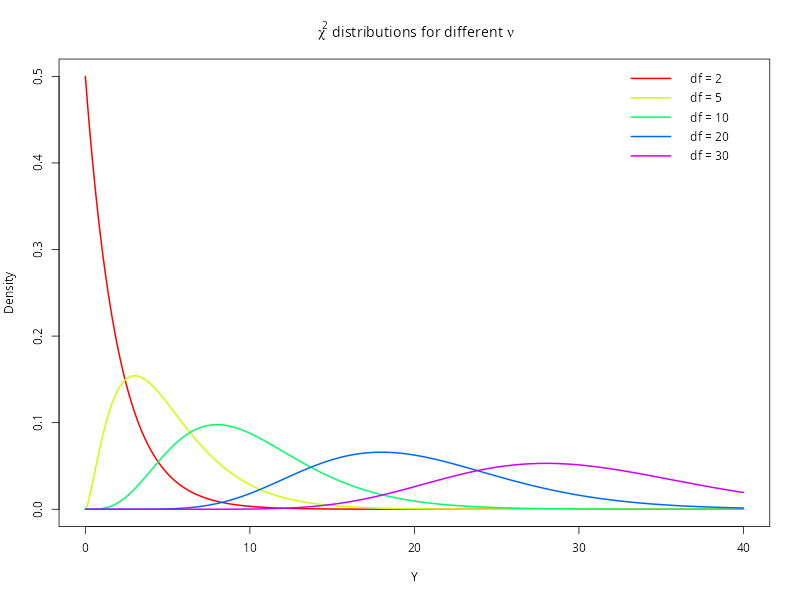

In [3]:
# Plot several chi-square distributions on the same axes

dfs <- c(2, 5, 10, 20, 30)
Y   <- seq(0, 40, length.out = 2000)

# Compute densities
densities <- lapply(dfs, function(nu) dchisq(Y, df = nu))

# Set up empty plot with sensible limits
ymax <- max(unlist(densities))
plot(Y, densities[[1]], type = "n",
     xlab = expression(Y),
     ylab = "Density",
     main = expression(chi^2 * " distributions for different " * nu))

cols <- rainbow(length(dfs))

# Add each curve
for (i in seq_along(dfs)) {
  lines(Y, densities[[i]], col = cols[i], lwd = 2)
}

legend("topright",
       legend = paste("df =", dfs),
       col = cols,
       lwd = 2,
       bty = "n")


Notice that $\nu$ controls the *width* of the distribution. Thus, the *uncertainty* around the value of $Y$ can be quantified using $\nu$. This is very important for understanding *where* degrees of freedom come from. 

However, because $\nu$ also controls the *mean*, we have a slight problem. As a sampling distribution for $\hat{\sigma}^{2}$, we can get the *shape* correct by using a suitable value for $\nu$. However, this will not necessarily be *scaled* correctly. For instance, $\chi^{2}(5)$ may well have the right *width* to capture the uncertainty in $\hat{\sigma}^{2}$, but the expected value is then $\nu = 5$. This would only work with data on a scale where $\sigma^{2} = 5$. So, the sampling distribution of $\hat{\sigma}^{2}$ *cannot* be a plain old $\chi^{2}(\nu)$ distribution, because the units would be wrong. Therefore, the actual sampling distribution must be a *scaled* version of the $\chi^{2}(\nu)$. 

To see how this scaling works, notice that if we were to multiply the whole distribution by $\sigma^{2}$, then the expected value would be $\sigma^{2} \times \nu$. This is obviously $\nu$-times too big. So if we first *divide* $\sigma^{2}$ by $\nu$, then the expected value becomes $\frac{\sigma^{2}}{\nu} \times \nu = \sigma^{2}$. We then end up with a distribution with the correct *width* (encoded by the *degrees of freedom*) and the correct *units* (by scaling the distribution by $\sigma^{2}/\nu$). So, the scaling term is a little bit of a distraction here. The key element is that *the degrees of freedom are a direct measure of our uncertainty around the estimate of $\sigma^{2}$*.

As $\nu$ is directly tied to the *sample size* (because $\nu = n - p$), as $n$ increases, so too does $\nu$. So, let us have a look and see what happens to the scaled $\chi^{2}$ as we increase $n$ and thus increase $\nu$. Below are 6 plots demonstrating what happens to the *shape* of scaled $\chi^{2}$ distribution as the sample size increases.

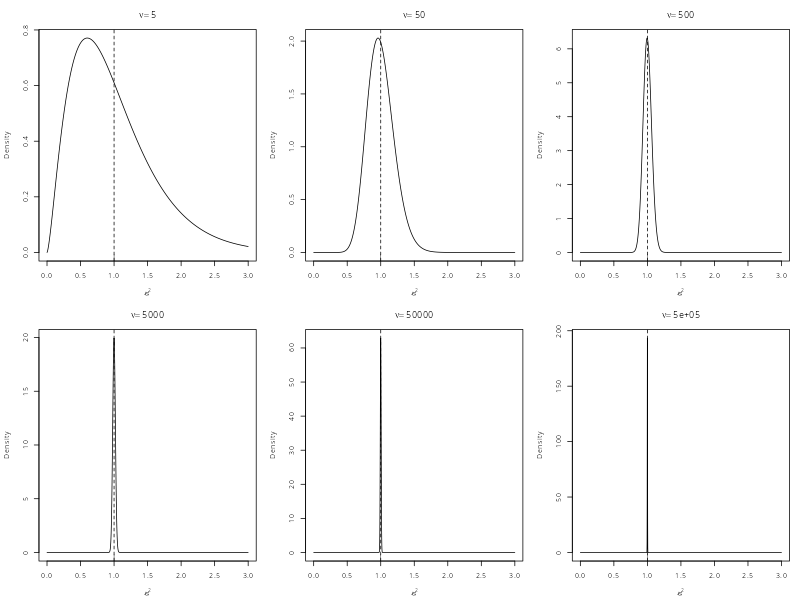

In [2]:
# Visualise the scaled chi-square variance estimator:
#   s2_hat = (sigma2 / nu) * X,  where X ~ chisq(nu)
# so s2_hat is centred on sigma2 and collapses onto sigma2 as nu grows.

sigma2 <- 1
dfs <- c(5, 50, 500, 5000, 50000, 500000)

# Density of s2_hat via change-of-variables:
# If S = (sigma2/nu) X, then f_S(s) = (nu/sigma2) * f_X((nu/sigma2)*s)
d_scaled_chisq <- function(s, nu, sigma2) {
  (nu / sigma2) * dchisq((nu / sigma2) * s, df = nu)
}

# Choose an x-range that makes the "collapse" obvious
x <- seq(0, 3, length.out = 2000)

# Pre-compute a common y-limit so all plots are comparable
ymax <- max(sapply(dfs, function(nu) max(d_scaled_chisq(x, nu, sigma2))))

op <- par(mfrow = c(2,3), mar = c(4, 4, 3, 1) + 0.1)
on.exit(par(op), add = TRUE)

for (nu in dfs) {
  y <- d_scaled_chisq(x, nu, sigma2)

  plot(x, y, type = "l",
       xlab = expression(hat(sigma)^2),
       ylab = "Density",
       xlim = c(0,3),
       main = bquote(nu == .(nu)))
  #     main = bquote(frac(sigma^2,nu) * chi^2 * "(" * nu * ")"))

  abline(v = sigma2, lty = 2)          # true variance
  rug(c(sigma2), ticksize = 0.03)
  #legend("topright",
  #       legend = c(bquote(nu == .(nu)), bquote(sigma^2 == .(sigma2))),
  #       bty = "n")
}

# If you want to *really* see the collapse for large nu, try narrowing xlim:
# e.g., set x <- seq(0.6, 1.4, length.out=2000) and xlim=c(0.6,1.4)


So, notice what happens. As the degrees of freedom go up, the width of the scaled $\chi^{2}$ distribution *shrinks*. When the sample size is *small*, there is a lot of uncertainty around the true value of $\sigma^{2}$. As the sample size gets *larger*, this uncertainty gets smaller and smaller until it effectively *vanishes*. So, the degrees of freedom exist *precisely* because they are the parameter of the sampling distribution that quantified our uncertainty about $\hat{\sigma}^{2}$. Once they get larger enough, the distribution is effectively a single point sat on the true variance and, for all practical purposes, we *know* $\sigma^{2}$.

### The Origin of the $t$-distribution
So, how does this behaviour of the scaled $\chi^{2}(\nu)$ connect to the null distribution of the test statistic? Well, we know that if you divide a normal random variate by a *constant* you just get another normal random variate on a different scale. Hence, when $\sigma^{2}$ is known, we get a $z$-statistic with a null distribution that is a standard normal. So what happens when you instead divide a normal random variate and a scaled $\chi^{2}(\nu)$ random variate? You get a new random variable whose distribution changes *dynamically* depending upon the uncertainty in the denominator. This is a $t$-distribution with $\nu$ degrees of freedom. 

So, the definition of the $t$-distribution is *exactly* the ratio between these two types of random variable. *This is where the $t$-distribution comes from*. The uncertainty in the denominator is passed *directly* through to the $t$-distribution via the degrees of freedom. We do not have to take the word of the theory to see this, as we can simulate this situation in `R`. The code below simulates values from a normal distribution and a scaled $\chi^{2}$ distribution. The simulated values are shown in the histograms, with the theoretical distribution curves overlaid. We then divide these two random variables and plot the histogram of the result. As we can see, the theoretical curve from the $t$-distribution fits *exactly*, showing that the theory is indeed correct.


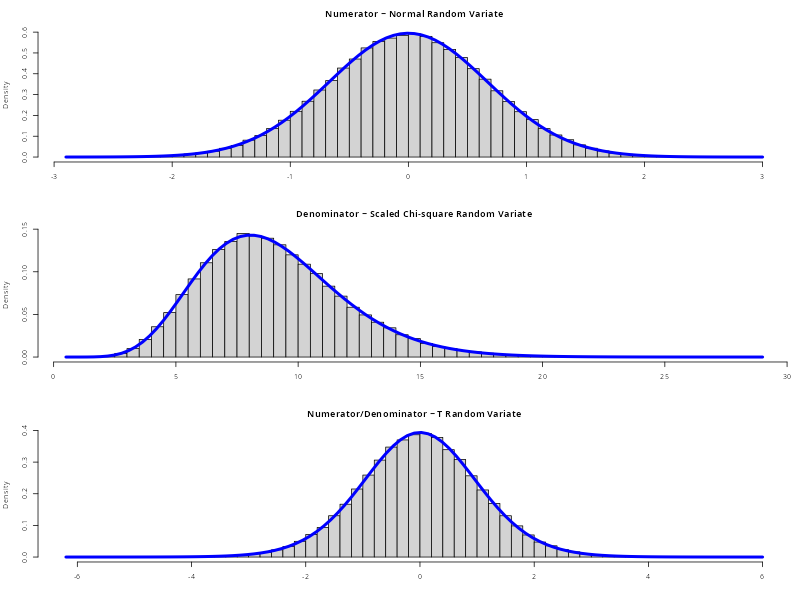

In [42]:
set.seed(555)

sigma   <- 3               # population standard deviation
sigma2  <- sigma^2         # population variance
n       <- 20              # sample size
nu      <- n - 1           # degrees of freedom
n.sim   <- 2e5             # number of simulations
std.err <- sigma / sqrt(n) # true standard error 

# Numerator: sampling distribution of the mean (assuming the null is TRUE)
numerator <- rnorm(n.sim, mean=0, sd=std.err)

# Denominator: sampling distribution of the variance
denominator <- sigma2/nu * rchisq(n.sim, df=nu) # scaled chi^2

# t-statistic
T <- numerator / sqrt(denominator/n)

par(mfrow=c(3,1), mar=c(4,4,3,1))

# 1. Sampling distribution of the numerator
hist(numerator, breaks=50, freq=FALSE,
     main='Numerator ~ Normal Random Variate',
     xlab='')
curve(dnorm(x, sd=sigma/sqrt(n)), add=TRUE, lwd=4, col='blue')

# 2. Sample distribution of the denominator
hist(denominator, breaks=50, freq=FALSE,
     main='Denominator ~ Scaled Chi-square Random Variate',
     xlab='')
curve((nu/sigma2)*dchisq((nu/sigma2)*x, df=nu), add=TRUE, lwd=4, col="blue")

# 4. Resulting t-statistic
hist(T, breaks=50, freq=FALSE,
     main='Numerator/Denominator ~ T Random Variate',
     xlab='')
curve(dt(x,df=nu), add=TRUE, lwd=4, col='blue')

par(mfrow=c(1,1))



We can also tie the behaviour of the $t$-distribution to the behaviour of the scaled $\chi^{2}$ we saw above. As the sample size goes *up*, $\nu$ also goes *up* and the scaled $\chi^{2}$ collapsed to a single point. As $\nu$ approaches *infinity*, we effectively have $\hat{\sigma}^{2} = \sigma^{2}$ and the $t$-statistic is dividing a random variable by a *constant*. At this point, the $t$-distribution becomes the standard normal distribution. So, once the degrees of freedom get large enough to be taken as *effectively infinite*, they basically *disappear* because they are no longer relevant as a method of quantifying uncertainty. This is because our uncertainty has collapsed to *nothing* and we are back to our original position of treating $\sigma^{2}$ as a constant and using $z \sim \mathcal{N}(0,1)$ for inference. This is why most of these problems disappear with large samples and why we can effectively *ignore* the whole idea of degrees of freedom once $n$ is big enough. This idea is important for understanding some of the "solutions" we will discuss further below.

### What Happens When We Use $\hat{\boldsymbol{\Sigma}}$?
We have now established what happens when we replace the unknown variance $\sigma^{2}$ with an *estimate* within the normal linear model. Crucially, this relies on knowing the sampling distribution of the estimate which, under the normal linear model, is scaled $\chi^{2}(\nu)$ distribution.​ This exact result is what allows us to derive the null distribution of the test statistic. Because this null distribution underpins both confidence intervals and $p$-values, having this distributional information is essential.

What changes when we move to a model with a non-trivial variance–covariance matrix $\boldsymbol{\Sigma}$, rather than a single variance parameter $\sigma^{2}$? The standard errors are no longer functions of a single variance term. Instead, they are complicated functions of multiple elements of $\boldsymbol{\Sigma}$. In the normal linear model, the distribution of the test statistic depended on the fact that the variance estimator had a known scaled scaled $\chi^{2}(\nu)$ distribution. Once the variance enters through an estimated covariance matrix, that structure disappears. The denominator of the test statistic is now a *complicated function of several estimated variance components*. So, the natural question is therefore: *what is the sampling distribution of a test statistic whose denominator is a complicated function of several estimated variance components?*. 

Unfortunately, this question has *no answer*. And without answer, we have no way of calculating $p$-values or confidence intervals. We are, in effect, *stuck*.


`````{admonition} Why Does This Question Have No Answer?
:class: info, dropdown
If you want to understand in more detail *why* the sampling distribution is *unknown*, the simplest answer is that when there are complex dependencies in the data, all of the clean algebra of the normal linear model disappears. The consequence is that the distribution of the test statistic can no longer be derived analytically. As noted above, the $\chi^{2}(\nu)$ distribution arises from summing independent squared normal variates. Under the normal linear model the errors are independent, and so the variance estimate fits exactly into the definition of a scaled $\chi^{2}$ distribution.

Methods that allow for more complex covariance structures can be conceptualised as *removing* the correlational structure from the data, returning us to the world of the normal linear model. If we knew $\boldsymbol{\Sigma}$ in advance, this removal would be perfect: the transformed errors would be independent, and the $\chi^{2}$ construction would apply exactly.

In practice, however, we only ever have an *estimate* of $\boldsymbol{\Sigma}$. This removal is therefore *imperfect*. The transformed errors are no longer guaranteed to be *independent*, and the form used to estimate variance is no longer a sum of independent squared normals. The defining conditions for a $\chi^{2}(\nu)$ distribution are lost.

One might hope that the $\chi^{2}$ result would still hold *approximately*. The problem is that “approximately” now means something different for every sample. Each dataset will be closer to or further from the true $\boldsymbol{\Sigma}$ in its own idiosyncratic way, and this feeds directly into the behaviour of the variance estimate. There is therefore no longer a single, universal $\chi^{2}(\nu)$ distribution that governs behaviour across repeated samples. Instead, what remains is a *moving target*: the distribution of the test statistic is conditional on the particular realised estimate of $\boldsymbol{\Sigma}$.

Remember, the whole point of a *sampling distribution* is to describe the behaviour of an estimate across hypothetical repeats of the *same* experiment. It is this fixed reference distribution that allows us to make probability statements about whether our estimate is *expected* or *unexpected*, and to quantify its uncertainty through standard errors and confidence intervals. If the distribution itself *changes* with each new sample, then it can no longer serve this role. There is no longer any structure that is invariant across repeats. The distribution becomes data-dependent. It warps from sample to sample according to how that particular dataset happened to estimate $\boldsymbol{\Sigma}$.

In that situation, probability statements cease to have their usual meaning. Any distribution we can write down applies only to *this* realised dataset, not to the hypothetical repetitions that define Frequentist inference. We are no longer reasoning about “what would happen if we repeated the experiment”, but only about the specifics of the single sample in front of us. Once that fixed cross-sample reference point disappears, the inferential machinery breaks. The very idea of a sampling distribution is lost, and with it the foundation on which classical inductive inference is built.
`````

## Practical Solutions to this Problem

So, we find ourselves in a difficult spot. What we *want* is a framework where we can have any form of covariance structure to accurately represent the data-generating process. This would allow us to model any type of repeated measures experiment, irrespective of its complexity. However, the inferential devices used by the normal linear model simply *do not allow this*. The emphasis on *knowing* the sampling distribution of the estimates in order to calculate $p$-values and confidence intervals has backed us into a corner. Once the very specific conditions that allow these to be calculated are gone, so too is the whole inferential machinery. What this really demonstrates is how *fragile* these methods are. 

So, we have two options available to us. One is to simply give up and spend our whole lives restricting inference to only those datasets where the classical results to still apply. The other is that we try and find a way forward, acknowledging that *no* perfect solution is going to exist. 

Clearly, our plan is to push forward with the *second option*, but it is important to understand from the very beginning that we are making a *comprise*. To understand why, we need to separate the idea of *model building* from *inference*. As a means of developing a description of the *data-generating process*, methods that allow for a more general covariance structure are much more applicable than those with very restrictive definitions. As such, we can develop much better *models* that describe *where the data came from* and can make better *predictions* of future data. The problem, of course, is performing *inference* using those models. So we have *better models* that we want to use, but *complexities* around reaching exact conclusions from these. As such, the compromise is that as soon as we leave the world of the normal linear model, our inference *has to become approximate*. This can be an uncomfortable conclusion, but it is the reality of trying to move beyond the traditional normal linear model.

### Option 1 - Pretend that $\boldsymbol{\Sigma}$ is Known
In terms of trying to push forward, despite all these complexities, our first solution is to simply assume that *we know* $\boldsymbol{\Sigma}$. Of course, we *do not*, that is the whole problem we are trying to address. However, if we simply assume that we have got $\boldsymbol{\Sigma}$ correct, pretty much all the problems highlighted above *disappear*. In general, there are three ways this is realised in practice:

- Simply treat our estimate as the true value and move forward 
- Treat our estimate as the true value, but *only* because we have enough data that the uncertainty has disappeared
- Treat our estimate as the true value, but only for the purpose of trying to *simulate* the uncertainty using computational methods

We will now discuss each of these in turn.

#### Assume $\hat{\boldsymbol{\Sigma}} = \boldsymbol{\Sigma}$
Our first option is to *ignore* the problem. If we treat our estimate as *exactly* the population value, then we can carry on without any issues. So, if we take $\hat{\boldsymbol{\Sigma}} = \boldsymbol{\Sigma}$ then there are no problems any more. In the context of GLS, this means we can remove the covariance structure *perfectly* and the whole problem reduces back to a regular regression model with $i.i.d.$ errors. So, we simply act as if we knew $\boldsymbol{\Sigma}$ all along.

Although this is *practically* appealing, because all the mess indicated above disappears, it comes with some consequences:

- The extra uncertainty from estimating $\boldsymbol{\Sigma}$ is simply ignored. This means the model contains no penalty for estimating all the variance and covariance parameters.
- This means that standard errors may be too small, test statistics too large and $p$-values overly-optimistic, especially in small samples.
- We are pretending that degrees of freedom exist as a universal marker of uncertainty, but they technically do not. Furthermore, because we are pretending that we got $\boldsymbol{\Sigma}$ for free, the degrees of freedom have no correction for estimating $\boldsymbol{\Sigma}$. As such, they will be *larger* than equivalent repeated measures ANOVA models.

#### Use *Asymptotic* Results
Our third option is to side-step degrees of freedom entirely. Recall from the normal linear model that the uncertainty that comes from estimating $\sigma^{2}$ effectively *disappears* once the same size is large enough. This is because $\hat{\sigma}^{2} = \sigma^{2}$, for all practical purposes. Thus, we can treat everything as if $\sigma^{2}$ is known, because our uncertainty is effectively 0. We saw this in the shape of the $t$-distribution. Once the sample size is big enough, the $t$-distribution *becomes* a standard normal distribution whose width is fixed, rather than adaptive. When this happens, the degrees of freedom disappear. So, whilst we normally work with something like

$$
\frac{\hat{\beta}_{1}}{\text{SE}(\hat{\beta}_{1})} \sim \mathcal{T}(\nu),
$$

it is not wrong to work with

$$
\frac{\hat{\beta}_{1}}{\text{SE}(\hat{\beta}_{1})} \sim \mathcal{N}(0,1).
$$

The only caveat is that the sample size needs to be *big enough* for the second option to be accurate. However, notice that this second option *does not need degrees of freedom*. We say that this test is *asymptotically correct*, meaning it gets more accurate as $n \rightarrow \infty$. All we need to do is make the assumption that we have enough data so that we can effectively treat our estimate of $\sigma^{2}$ as the *true value*. At that point it becomes a *constant*. So, there is no uncertainty to deal with, no sampling distribution to know, no concept of degrees of freedom and all the messiness disappears.

Although such asymptotic approaches are not necessary with the normal linear model, once we are in the realm of estimating a complex covariance structure this approach becomes more appealing. There is a *statistical purity* to this result because we do not need to pretend degrees of freedom still exist nor invent fictitious degrees of freedom based on the model. However, there are some clear issues here

- We need to be comfortable assuming that our $n$ is *large-enough* for this to work, but this is an *unanswerable* question (see box below).
- We need to be comfortable with the idea of dismissing uncertainty in the estimation of $\boldsymbol{\Sigma}$ as negligible.
- In small samples this will result in inference that is *optimistic*, though the open use of asymptotic tests already embeds this as a caution.

`````{admonition} How Large is "Large"?
:class: tip
If we want to lean on asymptotic theory, the obvious question is "how big does $n$ need to be?". The problem is that the definition is based on a *limit*, so it says that the approximation gets better and better as $n$ moves towards infinity. For our purpose, $n$ is the *number of subjects*, rather than the total amount of data. So, the answer is not that there is some magic sample size that is suddenly large enough, the answer is that the approximation will get better the larger $n$ becomes. The question then is more about what our tolerance for error is. The point of the asymptotic theory is to say that the error that comes from estimation becomes more negligible as $n$ grows, as does the penalty for estimating $\boldsymbol{\Sigma}$ from the data. So, unfortunately, there is *no honest numeric answer to this question*. The way to think about it is as a *degree of comfort*. If you are using FGLS with $n = 5$, you should feel *very uncomfortable*. If you are using $n = 50$, you should probably feel *cautious* and if you have $n > 200$ you should probably be feeling *reasonably comfortable*. As $n$ increases beyond that, you should probable feel perfectly fine about this approach. These are only ballpark figures, but the point is really to think of $n$ as a *continuum of comfort*, rather than as a *threshold*. 
`````

#### Use Simulations
The advantage here is that we do not assume the uncertainty around estimating $\boldsymbol{\Sigma}$ has a particular shape. Yes, we fix the value estimated from the data as the "truth", but the uncertainty around that "truth" is still captured via the simulations. This means we do not assume this uncertainty will have a particular sampling distribution, we let the simulations build the distribution over its many iterations. This neither requires assuming that the classical results still hold, nor requires enough data so that all these problems disappear.  

As a final option, we can leave the world of trying to derive precise results mathematically and instead use the power of the *computer* to find a solution. This gets us into the world of *resampling methods*, which we encountered briefly last semester in the form of the *permutation test*, used when the errors are not normally distributed. For the general problem of deriving a null distribution under an arbitrary covariance structure, the *parametric bootstrap* is most commonly employed. In this method we:

1. Treat a fitted null model as the "truth".
2. Use this fitted model to simulate new data.
3. Refit the model to the simulated dataset and save a copy of the test statistic.
4. Over many repeats of 2 and 3, build up a *distribution* of the test statistic under the null.
5. Calculate the $p$-value and confidence intervals from this distribution.

So this requires *zero* theory about the distribution of anything. The uncertainty comes through naturally as part of the simulation and we can get a $p$-value irrespective of the form of $\boldsymbol{\Sigma}$. So this has some distinct advantages because we can get rid of much of the difficult approximation needed in classical approaches. However, the tradeoffs are

- Computational burden, as calculating a single $p$-value can be a long process depending upon the complexity of refitting the model 1,000 times or more.
- Fundamentally, we have to assume that our models is a close approximation to the truth for this to work. This can be seen as quite a *strong* assumption.

### Option 2 - Acknowledge that $\hat{\boldsymbol{\Sigma}}$ is an *Estimate*
Our second option is to accept that $\hat{\boldsymbol{\Sigma}}$ is an estimate and accept that we need to accommodate this uncertainty somehow. In order to do this, we can create *fictitious* degrees of freedom to allow a $p$-value to be calculated. So, although we fully accept that degrees of freedom no longer exist, what we can do is *find* a null distribution that matches our model and then use the degrees of freedom from that distribution. For instance, we can use a combination of heuristics and information in the model to approximate the *variance* of the calculated test statistic. If we know that the variance of the $t$-distribution is $\frac{\nu}{\nu - 2}$, then we can use our approximated variance to solve for $\nu$. This gives us a $t$-distribution with approximately the *correct width* for our calculated test statistic. These fictitious degrees of freedom are known as *effective* degrees of freedom. They attempt to capture *universal uncertainty* in the same way that traditional degrees of freedom do, but within a context where this definition is no longer applicable.

This method is perhaps more appealing than simply pretending there is no problem because it tried to accommodate small sample adjustments and uncertainty, though it also comes with some consequences:

- We are assuming that the true null distribution only differs from known null distributions (such as the $t$ and $F$) by its width, but not the general shape.
- This still remains an *approximation*, though it should behave better in smaller samples when degrees of freedom become more necessary.
- Degrees of freedom can become fractional and no longer have a clear theoretical grounding. They are more devices to encode "tail-heaviness" within the familiar language of $t$ and $F$ distributions. 

In fact, we already saw an example of this last week in terms of the *non-sphericity corrections*.

## Where Does All This Leave Us?
So, where do these problems leave us in terms of leaving the world of very stringent covariance assumptions?

... Ultimately, from the pure perspective of a *model* that capture the *data-generating process*, FGLS is an attractive proposition ... Unfortunately, the problems arrive as soon as we get to *inference* due to the fragility of the classic approaches to this problem. However, the reality is that as soon as we leave the world of the normal linear model, we leave the world of precise results and always end up in a world of approximations. This is not just a FGLS problem, this is a *global* problem. So if we ever want to use something more complicated than the normal linear model, we have to accept that precise inference breaks-down and we have to approximate it. The fundamental question simply becomes how *best* to approximate it so we can still reach useful conclusions from our models.

[^weights-foot]: This is why the argument in `gls()` was `weights=`.

[^corfunc-foot]: You can look up descriptions of all of these using `?corClasses` at the prompt. 

[^white-foot]: This is sometimes known as *whitening* the data. This is a term you may come across in the neuroimaging literature, particularly in relation to how fMRI is analysed.

[^emmeans-foot]: The `mode=` option has been set to `df.error` so that the reported test matches the table from `summary()`. `emmeans` actually has some better ways of adjusting the degrees of freedom to accommodate the uncertainty in estimating $\boldsymbol{\Sigma}$, but this is a complication we will leave to one side for now.

[^chisq-foot]: Sound suspiciously close to how the variance is estimated from the residuals in a normal linear model?